In [1]:
%env CUDA_LAUNCH_BLOCKING=1

env: CUDA_LAUNCH_BLOCKING=1


In [84]:
%load_ext autoreload
%autoreload complete
# %aimport ...

import sys
import importlib
import warnings

importlib.invalidate_caches()

for mod_name in list(sys.modules):
    if not (str.startswith(mod_name, "robotodo") or str.startswith(mod_name, "tensorspecs")):
        continue
    try:
        importlib.reload(sys.modules[mod_name])
    except Exception as error:
        warnings.warn(f"{error}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from robotodo.engines.isaac._kernel import Kernel

# kernel = Kernel(["--empty", "--enable", "omni.kit.uiapp", "--list-exts"], kit_path=None)
# kernel = Kernel(["--empty", "--enable", "isaacsim.exp.base"], kit_path=None)
# kernel = Kernel(["--enable", "isaacsim.exp.full", "--/log/level=Warning", "--/log/enableStandardStreamOutput=false"])
kernel = Kernel([
    # "--/rtx/rendermode=PathTracing",
    # "--/rtx/rendermode=RaytracedLighting", 
    # "--/post/aa/op=3",
    # "--/omni.kit.plugin/syncUsdLoads=true", 
    # "--reset-user", 
    # "--/log/outputStreamLevel=Error",
    # "--/log/async=true",
    "--/log/file=/tmp/todo-isaacsim.log",
    "--/log/enableStandardStreamOutput=true",
], kit_path="isaacsim.exp.full.kit")
# kernel = Kernel(["--reset-user", "--/log/file=/tmp/todo-isaacsim.log"], kit_path="isaacsim.exp.base.kit")
kernel.start_app_loop_soon()

[Warning] [simulation_app] Interactive python shell detected but ISAAC_JUPYTER_KERNEL was not set. Problems with asyncio may occur
[Warning] [simulation_app] Please use Isaac Sim Python 3 kernel instead of the default Python 3 Kernel
Loading user config located at: '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/user.config.json'

|---------------------------------------------------------------------------------------------|
| Driver Version: 535.247.01    | Graphics API: Vulkan
|=============================================================================================|
| GPU | Name                             | Active | LDA | GPU Memory | Vendor-ID | LUID       |
|     |                                  |        |     |            | Device-ID | UUID       |
|     |                                  |        |     |            | Bus-ID    |            |
|---------------------------------------------------------------------------------

Checking to see if RMW can be loaded:
failed to get symbol 'rmw_init_options_init' due to Environment variable 'AMENT_PREFIX_PATH' is not set or empty, at /workspace/humble_ws/src/rmw_implementation/src/functions.cpp:171, at /workspace/humble_ws/src/rcl/rcl/src/rcl/init_options.c:75
RMW was not loaded



2025-10-11T04:06:11Z [16,175ms] [Error] [isaacsim.ros2.bridge.impl.extension] ROS2 Bridge startup failed


In [4]:
# TODO 
from robotodo.engines.isaac.builder import load_usd_scene

scene = await load_usd_scene(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/default_environment.usd",
    # "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/gridroom_black.usd",
    _kernel=kernel,
)

2025-10-11T04:06:13Z [17,972ms] [Error] [carb.graphics-vulkan.plugin] Could not get NGX parameters block because NGX isn't enabled.
2025-10-11T04:06:13Z [17,972ms] [Error] [carb.graphics-vulkan.plugin] Failed to create NGX context.
2025-10-11T04:06:13Z [18,124ms] [Error] [rtx.optixdenoising73.plugin] Failed to create an Optix adaptor for device 0


In [ ]:
from robotodo.engines.isaac.scene import Scene
from robotodo.engines.isaac.builder import load_urdf, load_usd
from robotodo.utils.pose import Pose


# scene = Scene(_kernel=kernel)


# TODO this requires the stage to be editable!!!!
panda = await load_urdf(
    "./todo-curobo-sample-configs/franka/franka_description/franka_panda.urdf", 
    scene=scene, 
    fix_root_link=True,
)


mug = await load_usd(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Props/Mugs/SM_Mug_A2.usd",
    scene=scene,
)

mug.collidable = True
mug.rigid_body.enabled = True
mug.pose = Pose(p=[.5, .5, .5])


2025-10-11T04:06:15Z [19,605ms] [Error] [omni.usd] Runtime Error: in Create at line 46 of /builds/omniverse/usd-ci/USD/pxr/usd/ar/filesystemWritableAsset.cpp -- Could not create directory '/configuration/' for asset '/configuration/anon:0x7f5358005ce0:World1_sensor.usd'

2025-10-11T04:06:15Z [19,605ms] [Error] [omni.usd] Runtime Error: in StartPacking at line 2462 of /builds/omniverse/usd-ci/USD/pxr/usd/usd/crateFile.cpp -- Unable to open /configuration/anon:0x7f5358005ce0:World1_sensor.usd for write

2025-10-11T04:06:15Z [19,606ms] [Error] [omni.usd] Runtime Error: in Create at line 46 of /builds/omniverse/usd-ci/USD/pxr/usd/ar/filesystemWritableAsset.cpp -- Could not create directory '/configuration/' for asset '/configuration/anon:0x7f5358005ce0:World1_physics.usd'

2025-10-11T04:06:15Z [19,606ms] [Error] [omni.usd] Runtime Error: in StartPacking at line 2462 of /builds/omniverse/usd-ci/USD/pxr/usd/usd/crateFile.cpp -- Unable to open /configuration/anon:0x7f5358005ce0:World1_physics

In [6]:
mug.pose = Pose(p=[0, 0, 2])

In [106]:
await anext(mug.on_contact)

Contact(entity0=<robotodo.engines.isaac.entity.Entity object at 0x7f5a54353d90>, entity1=<robotodo.engines.isaac.entity.Entity object at 0x7f5a7c369e10>, points=ContactPoint(position=array([[-1.25934756, -0.12510656, -0.01776128],
       [-1.26219189, -0.19724561, -0.01776191],
       [-1.33305395, -0.14999171, -0.01776198],
       [-1.33305395, -0.14999171, -0.01776198]]), impulse=array([[8.58159266e-10, 0.00000000e+00, 6.38706982e-03],
       [1.22157616e-07, 0.00000000e+00, 9.09189284e-01],
       [1.12632485e-07, 0.00000000e+00, 8.38296056e-01],
       [9.19513895e-15, 0.00000000e+00, 6.84371670e-08]]), normal=array([[1.34358856e-07, 0.00000000e+00, 1.00000012e+00],
       [1.34358856e-07, 0.00000000e+00, 1.00000012e+00],
       [1.34358856e-07, 0.00000000e+00, 1.00000012e+00],
       [1.34358856e-07, 0.00000000e+00, 1.00000012e+00]]), separation=array([-0.01776109, -0.01776175, -0.01776179, -0.01776179])), anchors=ContactAnchor(position=array([[-1.33305395, -0.14999172, -0.0177619

In [43]:
mug.rigid_body.mass

tensor([[0.6329]])

In [73]:
mug.geometry

[[PolygonMesh(vertices=array([[-9.70949441e-17,  7.41638930e-02,  6.70092377e-02],
         [-1.05145170e-16,  6.79847321e-02,  7.39107497e-02],
         [-8.96764180e-17,  7.71494276e-02,  6.19627748e-02],
         ...,
         [ 2.65790933e-02, -2.00716205e-02,  2.28881831e-07],
         [ 2.83167451e-02, -1.75328918e-02,  2.41994852e-07],
         [ 2.98133271e-02, -1.48454377e-02,  2.46763224e-07]]), face_vertex_counts=array([3, 3, 3, ..., 3, 3, 3], dtype=int32), face_vertex_indices=array([ 131,  490,    0, ..., 2641, 2555, 2556], dtype=int32))]]

In [ ]:
from robotodo.engines.isaac.builder import build_geometric
from robotodo.utils.geometry import Sphere

sphere = await build_geometric(Sphere(radius=.1), scene=scene)
sphere.collidable = True
sphere.rigid_body.enabled = True
sphere.pose = Pose(p=[0, 0, 2])

In [88]:
list(scene.traverse())

['/',
 '/OmniverseKit_Right',
 '/OmniverseKit_Front',
 '/World',
 '/World/Looks',
 '/World/Looks/theGrid',
 '/World/Looks/theGrid/Shader',
 '/World/GroundPlane',
 '/World/GroundPlane/CollisionPlane',
 '/World/SphereLight',
 '/World/Environment',
 '/World/Environment/Geometry',
 '/OmniverseKit_Top',
 '/Render',
 '/Render/OmniverseKit',
 '/Render/OmniverseKit/HydraTextures',
 '/Render/OmniverseKit/HydraTextures/omni_kit_widget_viewport_ViewportTexture_0',
 '/Render/OmniverseGlobalRenderSettings',
 '/Render/Vars',
 '/Render/Vars/LdrColor',
 '/visuals',
 '/visuals/base_link',
 '/visuals/panda_link0',
 '/visuals/panda_link0/link0',
 '/visuals/panda_link0/link0/mesh',
 '/visuals/panda_link0/link0/mesh/Shell010_001',
 '/visuals/panda_link0/link0/mesh/Shell003_001',
 '/visuals/panda_link0/link0/mesh/Shell009_001',
 '/visuals/panda_link0/link0/mesh/Shell002_001',
 '/visuals/panda_link0/link0/mesh/Shell001_001',
 '/visuals/panda_link0/link0/mesh/Face636_001',
 '/visuals/panda_link0/link0/mesh/Pa

In [42]:
import omni

omni.physx.scripts.physicsUtils.add_rigid_box?

Signature:
omni.physx.scripts.physicsUtils.add_rigid_box(
    stage: pxr.Usd.Stage,
    path: Union[ForwardRef('str'), pxr.Sdf.Path],
    size: pxr.Gf.Vec3f = Gf.Vec3f(1.0, 1.0, 1.0),
    position: pxr.Gf.Vec3f = Gf.Vec3f(0.0, 0.0, 0.0),
    orientation: pxr.Gf.Quatf = Gf.Quatf(1.0, Gf.Vec3f(0.0, 0.0, 0.0)),
    color: pxr.Gf.Vec3f = Gf.Vec3f(1.0, 1.0, 1.0),
    density: float = 1.0,
    lin_velocity: pxr.Gf.Vec3f = Gf.Vec3f(0.0, 0.0, 0.0),
    ang_velocity: pxr.Gf.Vec3f = Gf.Vec3f(0.0, 0.0, 0.0),
) -> pxr.Usd.Prim
Docstring:
Add UsdGeom.Cube to the stage and add physics rigid body and collider API to it.

Args:
    stage:      The Usd.Stage to add cube.
    path:       The desired cube path.
    size:       The size of the cube.
    position:   The position where the cube should be placed in stage.
    orientation:   The cube orientation.
    color:      The color of the mesh.
    lin_velocity: The initial linear velocity of the rigid body.
    ang_velocity: The initial angular veloci

In [47]:
import pxr

pxr.UsdPhysics.RigidBodyAPI.CreateRigidBodyEnabledAttr
pxr.UsdPhysics.MassAPI

pxr.UsdPhysics.MassAPI

In [112]:
from robotodo.engines.isaac.entity import Entity

ground = Entity("/World/GroundPlane/CollisionPlane", scene=scene)
ground.collidable

await anext(ground.on_contact)

Contact(entity0=<robotodo.engines.isaac.entity.Entity object at 0x7f5a442c5350>, entity1=<robotodo.engines.isaac.entity.Entity object at 0x7f5a3c711f10>, points=ContactPoint(position=array([[-1.34163761e+00, -1.74771771e-01, -7.55096380e-07],
       [-1.28117478e+00, -2.18045861e-01, -5.17864009e-08],
       [-1.35524964e+00, -1.90989584e-01,  1.92487005e-06],
       [-1.28117478e+00, -2.18045861e-01, -5.17864009e-08]]), impulse=array([[1.60986757e-09, 0.00000000e+00, 1.19818514e-02],
       [7.17600956e-09, 0.00000000e+00, 5.34092858e-02],
       [4.37681891e-09, 0.00000000e+00, 3.25755924e-02],
       [7.11500248e-10, 0.00000000e+00, 5.29552205e-03]]), normal=array([[1.34358856e-07, 0.00000000e+00, 1.00000012e+00],
       [1.34358856e-07, 0.00000000e+00, 1.00000012e+00],
       [1.34358856e-07, 0.00000000e+00, 1.00000012e+00],
       [1.34358856e-07, 0.00000000e+00, 1.00000012e+00]]), separation=array([-5.51342964e-07,  1.49011612e-07,  2.07871199e-06,  1.49011612e-07])), anchors=Con

In [118]:
ground

Entity('/World/GroundPlane/CollisionPlane', scene=<robotodo.engines.isaac.scene.Scene object at 0x7f5a6e70f0d0>)

In [122]:
panda.dof_positions = 1

In [114]:
await anext(ground.on_contact)


Contact(entity0=<robotodo.engines.isaac.entity.Entity object at 0x7f5a3c7d3290>, entity1=<robotodo.engines.isaac.entity.Entity object at 0x7f5a3c7f7090>, points=ContactPoint(position=array([[-1.35830015e-01,  6.63150027e-02,  9.81998483e-07],
       [-1.22699817e-03, -9.46139991e-02, -3.20000981e-05],
       [-1.31625012e-01, -6.87989965e-02, -1.02146271e-06],
       [-1.35830015e-01,  6.63150027e-02,  9.81998483e-07]]), impulse=array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]), normal=array([[1.34358856e-07, 0.00000000e+00, 1.00000012e+00],
       [1.34358856e-07, 0.00000000e+00, 1.00000012e+00],
       [1.34358856e-07, 0.00000000e+00, 1.00000012e+00],
       [1.34358856e-07, 0.00000000e+00, 1.00000012e+00]]), separation=array([ 1.0009876e-06, -3.1999989e-05, -1.0009876e-06,  1.0009876e-06])), anchors=ContactAnchor(position=array([[-1.35829985e-01,  6.63149878e-02,  9.98377800e-07],
       [-1.22700818e-03, -9.46139768e-02, -3.19816172e-05]]), impuls

In [86]:
from robotodo.engines.isaac.builder import build_camera

cam = await build_camera(scene=scene)

In [65]:
from robotodo.utils.pose import Pose

# cam.pose = Pose.from_lookat([1, 1, 1], p_target=[0, 0, 0])
# cam.pose = Pose.from_lookat([1, 1, 1], p_target=panda.link_poses[..., -1].p)
cam.pose = Pose.from_lookat([1, 1, 1], p_target=mug.pose.p)

In [57]:
mug.pose

Pose(p=array([[0.468651  , 0.51576203, 0.49941696]]), q=array([[-0.3374961 , -0.62648774,  0.02684562,  0.7020604 ]]))

In [54]:
scene.viewer.draw_pose(mug.pose)

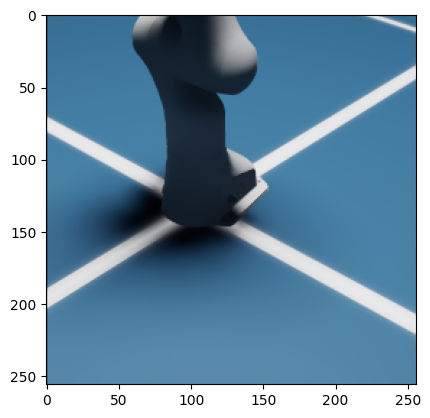

In [56]:
import matplotlib.pyplot as plt

plt.imshow(cam.read_rgba()[0].cpu())

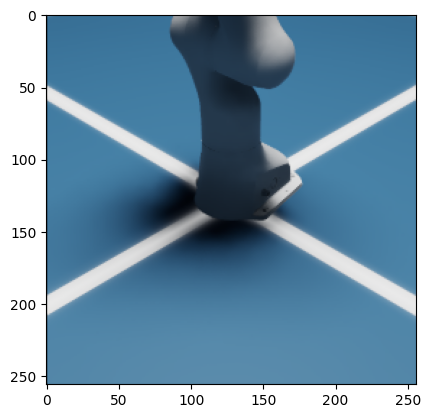

In [120]:
cam.pose = Pose.from_lookat([1, 1, 1], p_target=[0, 0, 0])
plt.imshow(cam.read_rgba()[0].cpu())

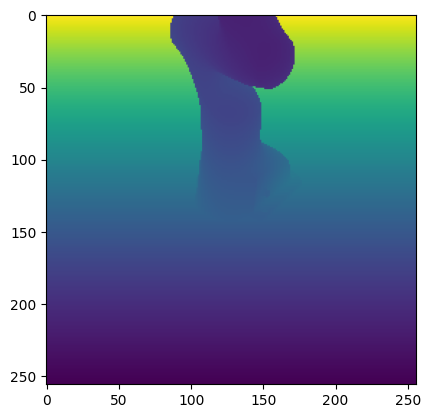

In [121]:
plt.imshow(cam.read_depth()[0].cpu())


In [125]:
%%timeit -n 100
cam.read_depth()
cam.read_rgba()

944 μs ± 46.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


2025-10-11T06:13:51Z [7,675,687ms] [Error] [omni.kit.browser.folder.core.models.folder_browser_model] Exception when traverse: https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Robots, [Errno 2] No such file or directory: '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/isaacsim/exts/isaacsim.asset.browser/cache/isaacsim.asset.browser.cache.json'
2025-10-11T06:13:51Z [7,675,697ms] [Error] [omni.kit.browser.folder.core.models.folder_browser_model] [omni.ui.tests.compare] Traceback:
Traceback (most recent call last):
  File "/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/exts/3/omni.kit.browser.folder.core-1.10.10/omni/kit/browser/folder/core/models/folder_browser_model.py", line 694, in _run
    done = await folder.start_traverse(on_connected_fn=self.__on_server_connected)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sysadmin/lab/robo

In [32]:
scene.viewer.clear_drawings()

In [33]:
scene.viewer.draw_pose(cam.pose)
scene.viewer.draw_pose(mug.pose)